### Assignment 5 -- Multi Linear Regression

#### Problem Statement 2nd

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

Dataset--> 50_Startsups.csv

In [1]:
#Importing the Required Labaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading The Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/50_Startups.csv")
Dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Renaming the column
Because of spaces between the column "R&D Spend" and "Marketing Spend"

In [3]:
#rename the R&D Spend & Marketing Spend column axis=1 perform it based on column 
Dataset = Dataset.rename({'R&D Spend': 'R_D_Spend','Marketing Spend': 'Marketing_Spend'}, axis=1)
Dataset.head()

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#Checking For Dtypes of Column and NA value
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


##### inference: There are no NA values Present in the Dataset, but Dtype of 'State' is Object, So Dropping State Column

In [5]:
#Droping 'State' Column as it is of object Dtype
Dataset = Dataset.drop(["State"], axis = 1)
Dataset.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


#### Transformation

In [6]:
# Performing Log Transformation on X 
Transdf= np.sqrt(Dataset.iloc[:,:3])
Transdf.head()

,R_D_Spend,Administration,Marketing_Spend
0,406.631529,369.997027,686.865416
1,403.234051,389.072731,666.257105
2,391.716109,318.033882,638.697534
3,379.963696,344.487808,619.031195
4,376.971272,302.310718,605.118517


In [7]:
Dataset = pd.concat([Transdf,Dataset.iloc[:,3:]],axis = 1)
Dataset.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,406.631529,369.997027,686.865416,192261.83
1,403.234051,389.072731,666.257105,191792.06
2,391.716109,318.033882,638.697534,191050.39
3,379.963696,344.487808,619.031195,182901.99
4,376.971272,302.310718,605.118517,166187.94


### Detecting Collinearity --- Between Columns

##### Correlation Matrix -- using this method to get a overlook of collinearity present in the dataset

In [8]:
#corr()
Dataset.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.263117,0.689709,0.951352
Administration,0.263117,1.000000,-0.008601,0.216830
Marketing_Spend,0.689709,-0.008601,1.000000,0.691570
Profit,0.951352,0.216830,0.691570,1.000000


##### Scatterplot between variables

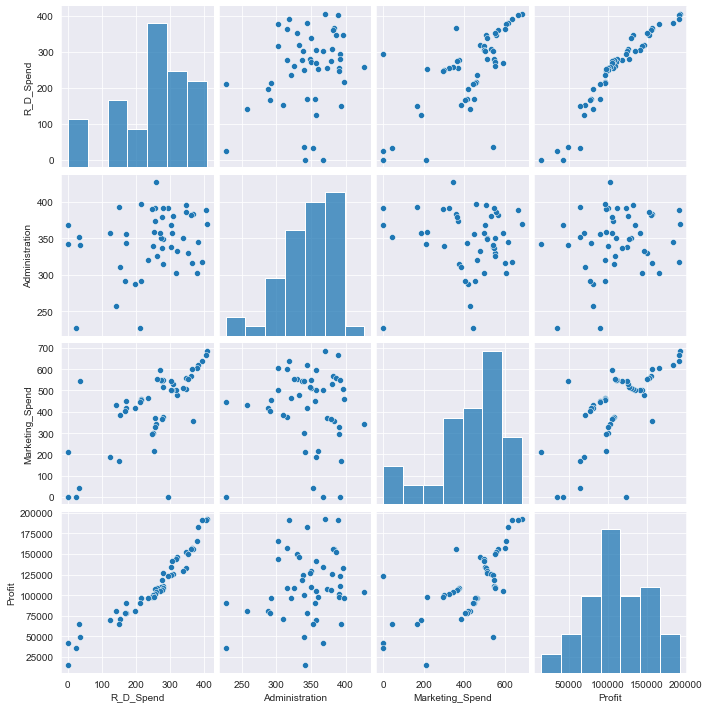

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Dataset)

Inference:

Profit & R_D_spend: 0.97 --> Strong Positive Correlation --> Useful For Model Building

Profit & Administration: 0.2 --> Low Positive Correlation --> Useful For Model Building

Profit & Marketing_Spend: 0.74 --> Strong Positive Correlation --> Useful For Model Building

Collinearity Effect Chances
R_D_spend & Marketing_Spend: 0.72 --> Strong Positive Correlation --> Can have Collinearity effect

#### Preparing a model --Initial Model

##### 1st Model

In [10]:
#Build the model --1st Model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend + Administration + Marketing_Spend',data=Dataset).fit()

In [11]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept           1.658518
R_D_Spend          13.781821
Administration     -0.497220
Marketing_Spend     0.916852
dtype: float64 
 P_values is:  
 Intercept          1.040175e-01
R_D_Spend          6.055947e-18
Administration     6.214024e-01
Marketing_Spend    3.640023e-01
dtype: float64


In [12]:
#1st Model R_square.
First_model_R2 = (model.rsquared,model.rsquared_adj)
First_model_R2

(0.9079571755611123, 0.9019543826629239)

#### Hypothesis in MLR

B0 = Beta0 , B1 = Beta1.....B8 = Beta8

H0: B1 = 0, B1--> Slope is Zero Then B1 Variable is not Useful in Predicting

H1: B1 ≠ 0, B1--> Slope is not Zero B1 Variable is  Useful in Predicting

(Like This for All Four Betas)

In [13]:
#Hypothesis Test of MLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and B1(R_D_Spend) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and B1(R_D_Spend) is Insignificant in Predicting")

if model.pvalues[2] < α:
    print("p_value is:",model.pvalues[2],", Reject H0,Slope is not Zero and B2(Administration) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[2],", Fail to Reject H0,Slope is Zero and B2(Administration) is Insignificant in Predicting")

if model.pvalues[3] < α:
    print("p_value is:",model.pvalues[3],", Reject H0,Slope is not Zero and B3(Marketing_Spend) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[3],", Fail to Reject H0,Slope is Zero and B3(Marketing_Spend) is Insignificant in Predicting")

p_value is: 6.055946953126468e-18 , Reject H0,Slope is not Zero and B1(R_D_Spend) is Significant in Predicting
p_value is: 0.6214023833419986 , Fail to Reject H0,Slope is Zero and B2(Administration) is Insignificant in Predicting
p_value is: 0.36400233176073404 , Fail to Reject H0,Slope is Zero and B3(Marketing_Spend) is Insignificant in Predicting


##### Inference: Through hypothesis Administration & Marketing_Spend  Column is giving insignificant,But First let confirm Using VIF

#### VIF(Variable inflation Factor) -- Using this method to confirm Collinearity if it is still there or not.

Checking all Y(input) Variable one by one regressing them with Eachother

Industry Standard ≤ 20 for VIF Value

In [14]:
rsq_RD = smf.ols('R_D_Spend~Administration+Marketing_Spend',data=Dataset).fit().rsquared  
vif_RD = 1/(1-rsq_RD) # 16.33

rsq_Adm = smf.ols('Administration~R_D_Spend+Marketing_Spend',data=Dataset).fit().rsquared  
vif_Adm = 1/(1-rsq_Adm) # 564.98

rsq_Mar = smf.ols('Marketing_Spend~R_D_Spend+Administration',data=Dataset).fit().rsquared  
vif_Mar = 1/(1-rsq_Mar) #  564.84

# Storing vif values in a data frame
d1 = {'Variables':['R_D_Spend','Administration','Marketing_Spend'],'VIF':[vif_RD,vif_Adm,vif_Mar,]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R_D_Spend,2.212834
1,Administration,1.160279
2,Marketing_Spend,2.059791


##### inference: There are no collinearity between variables Since All columns VIF is less then 20.

#### Model Validation Techniques -- 3 Technique

#### Test for Normality of Residuals (Q-Q Plot) -- 1st Technique

Datapoints must be inside Solid red Line or inside the 95% CI

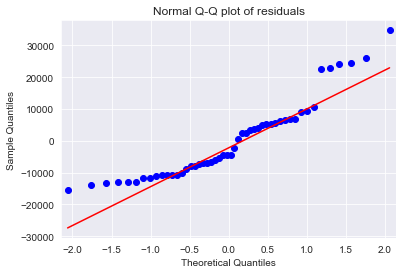

In [15]:
#Building the QQ Plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
#Getting a List of Outliers
list(np.where(model.resid>10000))

[array([ 0,  1,  2,  3, 45, 46, 47], dtype=int64)]

Inference: The Given Array is the Outlier if Residual >3000

#### Residual Plot for Homoscedasticity (Fitted VS Residuals, (Ei vsY^) ) --2nd Technique

In [17]:
#Defining a Function For Standardization Value.
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

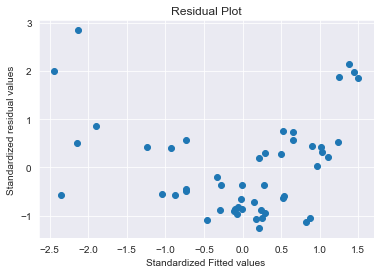

In [18]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

##### Inference:  Clear Pattern, Homoscedasicity

#### Residual Vs Regressors -- 3rd Technique (Ei vs Xi)

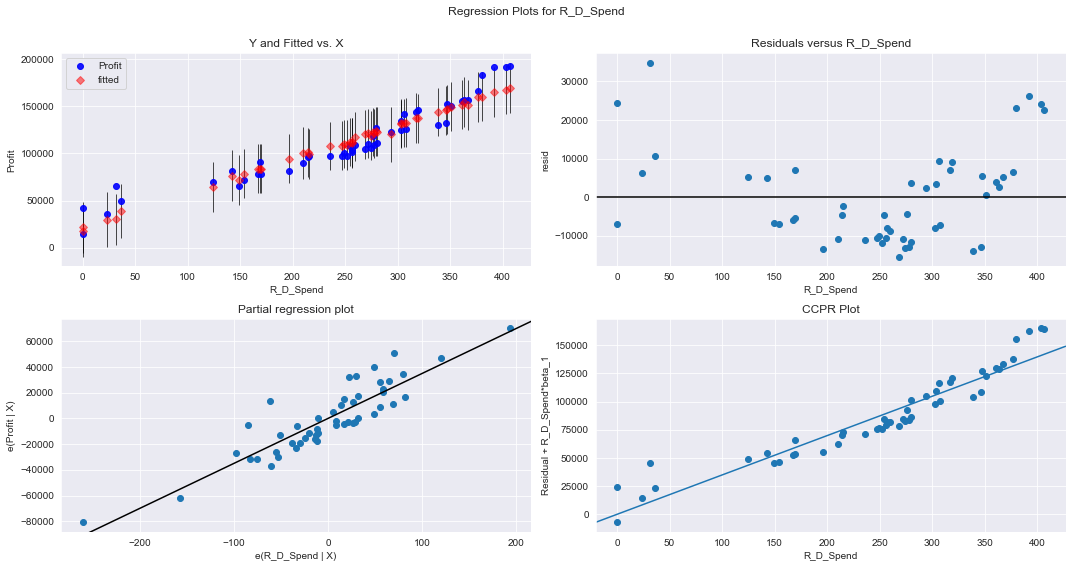

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "R_D_Spend", fig=fig)
plt.show()

##### Inference: CCPR Plot has Scope Which means R_D_Spend is Significant

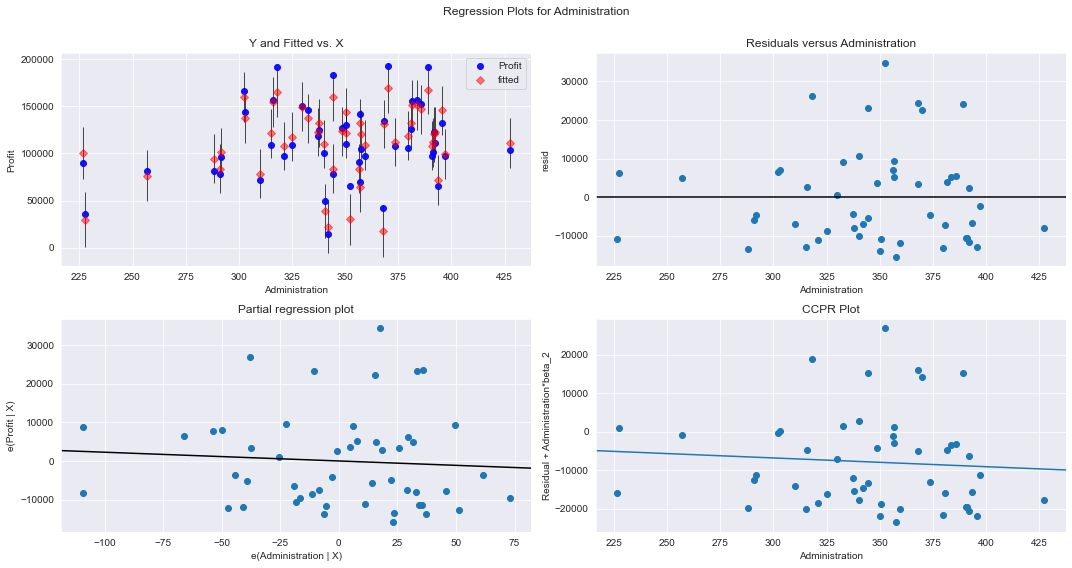

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

##### Inference: CCPR Plot has Scope Which means Administration is Significant

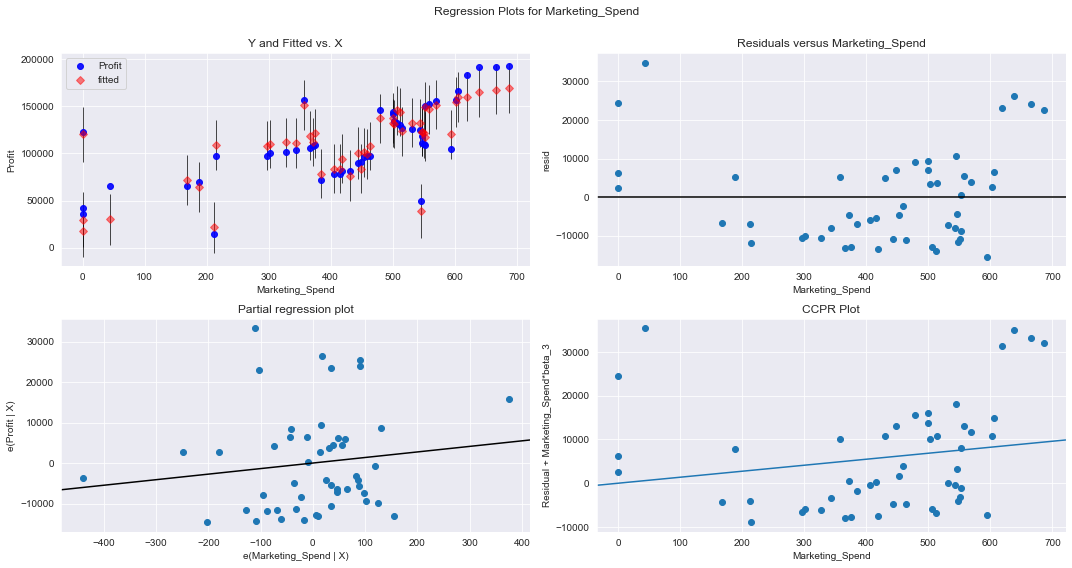

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

##### Inference: CCPR Plot has Scope Which means Marketing Spend is Significant

#### Model Deletion Diagnostics-- (Detecting Influencers/Outliers) -- Two methods

#### Cook’s Distance -- 1st Method (First Implementation)

In [22]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
(c,_) = model_influence.cooks_distance 
c

array([7.26970241e-02, 8.98960112e-02, 9.98382974e-02, 5.10120881e-02,
       7.17610848e-03, 7.42308463e-04, 5.18046239e-03, 1.42939897e-03,
       2.69240156e-03, 1.86433020e-05, 5.03719024e-03, 5.21064455e-03,
       3.76443099e-03, 5.43199634e-04, 1.62628764e-02, 1.13053956e-02,
       6.09044604e-04, 3.79569875e-03, 3.09559170e-03, 6.49092607e-03,
       1.01204342e-03, 1.59340233e-02, 6.97442893e-03, 5.08132618e-03,
       1.50907528e-02, 1.07146248e-03, 1.10406583e-02, 2.31635765e-02,
       1.24621215e-02, 9.93799829e-03, 7.34871215e-03, 1.10318147e-02,
       2.05824428e-02, 5.84658550e-03, 7.98583243e-04, 1.96752837e-03,
       5.23818206e-03, 5.11819573e-02, 5.96505855e-03, 1.81991818e-02,
       2.14342093e-03, 3.83883852e-03, 4.01175912e-03, 3.19280107e-03,
       7.95455371e-03, 3.43615724e-01, 1.10322849e-01, 2.46582891e-01,
       3.88690944e-02, 1.60486689e-02])

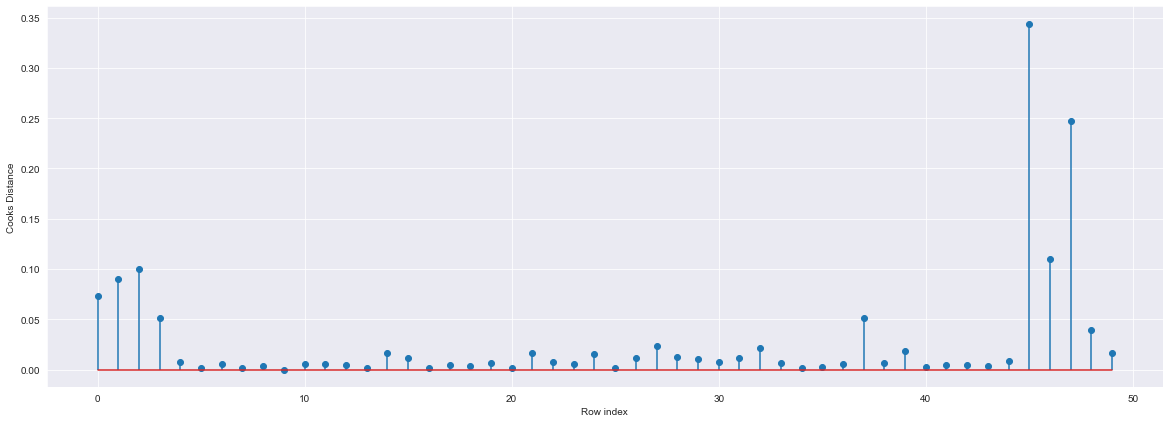

In [23]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(45, 0.34361572367750687)

##### inference: cook distance gives 45 index datapoint as the potential outliers but, let get some more no of outliers using Leverage method.

#### High Influence points-- 2nd Method (1st implementation)

After the influence Points is the outlier

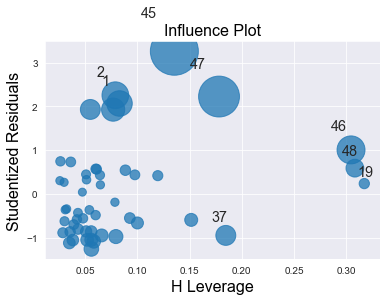

In [25]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [26]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = Dataset.shape[1]   # K = no of rows
n = Dataset.shape[0]   # n = no of columns
leverage = 3*((k + 1)/n)

leverage 

0.30000000000000004

##### Inference: After 0.30 any Datapoint is a outlier, so datapoint with index 45

#### Comparing the Extreme Observations (Outlier) with Other records in the dataset

In [27]:
# Getting the Values of observation From Cook Method
Dataset[Dataset.index.isin([45])]

,R_D_Spend,Administration,Marketing_Spend,Profit
45,31.626413,352.353572,43.634046,64926.08


In [28]:
#See the differences in R_D_Spend and other variable values
Dataset.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,406.631529,369.997027,686.865416,192261.83
1,403.234051,389.072731,666.257105,191792.06
2,391.716109,318.033882,638.697534,191050.39
3,379.963696,344.487808,619.031195,182901.99
4,376.971272,302.310718,605.118517,166187.94


##### Inference: As We can see observation are Extreme, as compared to other record in the Dataset.

#### Improving the model --Deleting the outlier point

In [29]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset1=Dataset.drop(Dataset.index[[45]],axis=0).reset_index()

In [30]:
#Drop the original index
Dataset1=Dataset1.drop(['index'],axis=1)
Dataset1.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,406.631529,369.997027,686.865416,192261.83
1,403.234051,389.072731,666.257105,191792.06
2,391.716109,318.033882,638.697534,191050.39
3,379.963696,344.487808,619.031195,182901.99
4,376.971272,302.310718,605.118517,166187.94


#### Build New Model after 1st Implementation of Cooks Distance And Leverage

##### 2nd Model

In [31]:
#Build the model --2nd Model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset1).fit()

In [32]:
#2nd Model R_square.
Second_model_R2 = (model.rsquared,model.rsquared_adj)
Second_model_R2

(0.9233474281048986, 0.9182372566452252)

In [33]:
#Checking Adj_R2 After Dropping Doors & cc columns
if First_model_R2[0]<Second_model_R2[0]:
    print("2nd Model is Better as its R2",Second_model_R2[0],"is more then 1st Model R2",First_model_R2[0])
else:
    print("1st Model is Better as its R2",First_model_R2[0],"is more then 2nd Model R2",Second_model_R2[0])

2nd Model is Better as its R2 0.9233474281048986 is more then 1st Model R2 0.9079571755611123


##### inference: R_squared of 2nd model is more than R_squared of 1st model, so 2nd model is better then 1st model

### Auto Model Deletion Diagnostics To Get Final Model - Using while loop

--Gives A List of R-Squares

In [34]:
while model.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset1).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Dataset1=Dataset1.drop(Dataset1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        Dataset
    else:
        final_model= smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset1).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9342693735042403
Thus model accuracy is improved to 0.9336032824159293
Thus model accuracy is improved to 0.9343558322420813
Thus model accuracy is improved to 0.9363821593197081
Thus model accuracy is improved to 0.9405326316783658
Thus model accuracy is improved to 0.9314742078600721
Thus model accuracy is improved to 0.9341507447119931
Thus model accuracy is improved to 0.9402973934822199
Thus model accuracy is improved to 0.9410672657530073
Thus model accuracy is improved to 0.9397362092642356
Thus model accuracy is improved to 0.9370958577428663
Thus model accuracy is improved to 0.9325501045220524
Thus model accuracy is improved to 0.9362292833016027
Thus model accuracy is improved to 0.9413122761372147
Thus model accuracy is improved to 0.9402886461682372
Thus model accuracy is improved to 0.9457546259835213
Thus model accuracy is improved to 0.9500674474521191
Thus model accuracy is improved to 0.958889832184251
Thus model accuracy is improv

#### predicting for new data 

In [35]:
#New data for prediction
new_data=pd.DataFrame({'R_D_Spend':154000.50,"Administration":150340.55,"Marketing_Spend":383600.78},index=[1])
new_data

,R_D_Spend,Administration,Marketing_Spend
1,154000.5,150340.55,383600.78


In [36]:
# Performing sqrt Transformation on X 
new_data = np.sqrt(new_data)

In [37]:
#Predicting For New Data/Record
final_model.predict(new_data)

1    171989.414248
dtype: float64

##### Inference: Profit Will be 171989.414248 for the given new record/Datapoint

In [38]:
#Coefficients
final_model.params

Intercept         -28900.060935
R_D_Spend            307.892845
Administration        47.279877
Marketing_Spend       99.670135
dtype: float64

Inference: Intercept is B0 = -28900.060935, R_D_Spend is B1 =  307.892845, Administration is B2 = 47.279877, Marketing_Spend is B3 = 99.670135

In [39]:
#### Manually  Calculating and Checking the regression equation of the  Final model

# Y = B0 + B1X1 + B2X2 + B3X3

#From Model
# B0 = -28900.060935
# B1 = 307.892845
# B2 = -47.279877
# B3 = 99.670135

In [40]:
#Calculating the New_data Values Manually

Y = (-28900.060935) + (307.892845*np.sqrt(154000.5)) + (47.279877*np.sqrt(150340.55)) + (99.670135*np.sqrt(383600.78))

Y

171989.41447979247

##### Inference: Manually Also Its gives the approx the Same results as the Regression equation built by the Model

#### Creating a DataFrame / Table of R_Squared

In [41]:
R2={'Prep_Models':['First_Model','Second_Model','Model','Final_Model'],'Rsquared':[First_model_R2[0],Second_model_R2[0],model.rsquared,final_model.rsquared]}
R2_table=pd.DataFrame(R2)
R2_table

,Prep_Models,Rsquared
0,First_Model,0.907957
1,Second_Model,0.923347
2,Model,0.993610
3,Final_Model,0.995440
